# <span style="color:darkblue"> QTM 530 Homework 3 </span>

Linchuan Zhang

10/2/2024

In [1]:
import requests      # Requests data from an API
import json          # Handles JSON object
import pandas as pd  # Handles data frames
import matplotlib.pyplot as plt # Plot

# <span style="color:darkblue"> Question (1) </span>

For this question, I mainly use the code presented for Question 1 of the "What are the publication sources located in Japan?" tutorial (https://docs.openalex.org/additional-help/tutorials) available in OpenAlex, and switch the filter to "title.search".

In [2]:
# Step 1: Collect information from the openalex API, and save as a JSON format.
url = "https://api.openalex.org/works"
params = {
    'filter': f'title.search:{'artificial intelligence'}'
}
r= requests.get(url, params=params)
num_works = r.json()['meta']['count']

# Step 2: Extract information contained in JSON format.
print(f"There are {num_works} works have “artificial intelligence” in the title.")

There are 139821 works have “artificial intelligence” in the title.


There are 139,656 works have “artificial intelligence” in the title.

# <span style="color:darkblue"> Question (2) </span>

For this question, the filters I use are "publication year", and "group_by", which can be found in the OpenAlex technical documents.

In [92]:
# Step 1: Collect information from the openalex API, and save as a JSON format
url_openalex_api_Q2 = \
      "https://api.openalex.org/works?filter=display_name.search:artificial intelligence,publication_year:2020-2024&group_by=authorships.countries"
      # Publication year filter: 2020-2024
      # Group_by filter: authorship countries
      
search_results_Q2 = requests.get(url_openalex_api_Q2).json()

with open('json_files/homework3_Q2.json', 'w') as file: 
    file.write(json.dumps(search_results_Q2, indent =4))

In [44]:
# Step 2: Check how many countries have at least 1 publication related to artificial intelligence
search_results_Q2["meta"]

{'count': 105807,
 'db_response_time_ms': 126,
 'page': 1,
 'per_page': 200,
 'groups_count': 196}

As shown above, the authors are from 196 countries (groups_count). Because one page can contain a maximum of 200 groups (per_page=200), I know I already collect information for all countries.

In [45]:
# Step 3: Create a variable to contain information on the number of countries (196)
aggregate_result = search_results_Q2["meta"]
country_number = aggregate_result["groups_count"]

# Step 4: Create an empty dataframe
data_entry_Q2 = pd.DataFrame([])

# Step 5: Use a loop function to input information for each group (each country) extracted from the JSON file row by row to the empty dataframe
for i in range(0,country_number):
    individual_result = search_results_Q2["group_by"][i]
    data_entry_Q2.loc[i,1] = individual_result["key_display_name"]
    data_entry_Q2.loc[i,2] = individual_result["count"]

In [46]:
# Step 6: Edit the format of the dataframe (rename columns and format the numbers as integers)
data_entry_Q2.rename(columns={data_entry_Q2.columns[0]: "Country" }, inplace = True)
data_entry_Q2.rename(columns={data_entry_Q2.columns[1]: "Number of Publications" }, inplace = True)
data_entry_Q2["Number of Publications"] = data_entry_Q2["Number of Publications"].astype(int)

# Step 7: Subset the 15 countries with the highest numbers of publications about AI
data_entry_Q2_sorted = data_entry_Q2.sort_values(by = "Number of Publications", ascending = False)
top15_country=data_entry_Q2_sorted.iloc[0:15,:]

top15_country.index = top15_country.index + 1 # Let the index start from 1 instead of 0
pd.set_option('display.max_colwidth', None) # Widen the column space, so the full content of each cell can be shown

display(top15_country)

,Country,Number of Publications
1,United States of America,15821
2,China,13099
3,India,9810
4,United Kingdom of Great Britain and Northern Ireland,5466
5,Germany,3392
6,Italy,3216
7,Canada,2781
8,Australia,2378
9,Russian Federation,2269
10,Spain,2261


I have information on the number of publications about AI across 196 countries. To save space, I only present the top 15 countries with the highest numbers of publications here. As shown in the table above, since 2020, the United States has the highest number of publications about AI (15,821 works), and China has the second highest number of publications about AI (13,099 works). 

# <span style="color:darkblue"> Question (3) </span>

For this question, the filters I use are "publication year", and "sort=cited_by_count", which can be found in the OpenAlex technical documents. 

Because the question is about finding information on the 10 most highly cited papers, a one-page search is sufficient. 

Additionally, Professor Sanchez-Becerra mentioned that for each paper, it is okay to search for the first author only, instead of all authors.

In [47]:
# Step 1: Collect information from the openalex API, and save as a JSON format
url_openalex_api_Q3 = \
      "https://api.openalex.org/works?page=1&filter=display_name.search:artificial intelligence,publication_year:2020-2024&sort=cited_by_count:desc"
      # Publication year filter: 2020-2024
      # Sort filter: cited_by_count, descending
      
search_results_Q3 = requests.get(url_openalex_api_Q3).json()

with open('json_files/homework3_Q3.json', 'w') as file: 
    file.write(json.dumps(search_results_Q3, indent =4))

In [48]:
# Step 2: Create an empty dataframe
data_entry_Q3 = pd.DataFrame([])

# Step 3: Use a loop function to gradually extract information from the JSON file, and input information to the empty dataframe
for i in range(0,10): # 10 most highly cited papers
    step1=search_results_Q3["results"][i]
    title=step1["title"]
    citation_count=step1["cited_by_count"]

    step2=step1["authorships"][0]
    step3=step2["author"]
    author_name=step3["display_name"]

    step4=step2["institutions"][0]
    author_institution=step4["display_name"]

    data_entry_Q3.loc[i,1] = title
    data_entry_Q3.loc[i,2] = citation_count
    data_entry_Q3.loc[i,3] = author_name
    data_entry_Q3.loc[i,4] = author_institution

In [49]:
# Step 4: Edit the format of the dataframe (rename columns and format the numbers as integers)
data_entry_Q3.rename(columns={data_entry_Q3.columns[0]: "Title" }, inplace = True)
data_entry_Q3.rename(columns={data_entry_Q3.columns[1]: "Citations" }, inplace = True)
data_entry_Q3.rename(columns={data_entry_Q3.columns[2]: "First Author" }, inplace = True)
data_entry_Q3.rename(columns={data_entry_Q3.columns[3]: "First Author Institution" }, inplace = True)
data_entry_Q3["Citations"] = data_entry_Q3["Citations"].astype(int)

# Step 5: Display infomration on the 10 most highly cited papers
data_entry_Q3.index = data_entry_Q3.index + 1 # Let the index start from 1 instead of 0
pd.set_option('display.max_colwidth', None)  # Widen the column space, so the full content of each cell can be shown

display(data_entry_Q3)

,Title,Citations,First Author,First Author Institution
1,Using Artificial Intelligence to Detect COVID-19 and Community-acquired Pneumonia Based on Pulmonary CT: Evaluation of the Diagnostic Accuracy,1851,Lin Li,Jianghan University
2,The role of artificial intelligence in achieving the Sustainable Development Goals,1502,Ricardo Vinuesa,Swedish e-Science Research Centre
3,"Review of Artificial Intelligence Techniques in Imaging Data Acquisition, Segmentation, and Diagnosis for COVID-19",1296,Feng Shi,United Imaging Healthcare (China)
4,Artificial Intelligence (AI) applications for COVID-19 pandemic,1261,Raju Vaishya,Indraprastha Apollo Hospitals
5,A Survey on Explainable Artificial Intelligence (XAI): Toward Medical XAI,1168,Erico Tjoa,Nanyang Technological University
6,Artificial Intelligence in Education: A Review,1134,Lijia Chen,Yango University
7,Photonics for artificial intelligence and neuromorphic computing,1023,Bhavin J. Shastri,Queen's University
8,Artificial intelligence–enabled rapid diagnosis of patients with COVID-19,928,Xueyan Mei,Icahn School of Medicine at Mount Sinai
9,Human Trust in Artificial Intelligence: Review of Empirical Research,885,Ella Glikson,Bar-Ilan University
10,Comparing Physician and Artificial Intelligence Chatbot Responses to Patient Questions Posted to a Public Social Media Forum,860,John W. Ayers,Qualcomm (United States)


Titles, number of citations, names of the first authors, and institutions the first authors affiliated with for the 10 most highly cited papers on AI since 2020 are all shown in the table. For example, the paper with the most citations is "Using Artificial Intelligence to Detect COVID-19 and Community-acquired Pneumonia Based on Pulmonary CT: Evaluation of the Diagnostic Accuracy", with a citation count of 1,851. The first author of this paper is Lin Li, from Jianghan University.

# <span style="color:darkblue"> Question (4) </span>

For this question, the filters I use are "title search", and "publication year", which can be found in the OpenAlex technical documents. 

In [50]:
# Step 1: Create a dataframe containing the four keywords I am going to search. The fourth keyword is "deep learning".
data_keywords = pd.DataFrame(columns=['Keyword'])
data_keywords.loc[0]='artificial intelligence'
data_keywords.loc[1]='LLM'
data_keywords.loc[2]='GPT'
data_keywords.loc[3]='deep learning'

# Step 2: Create an empty dataframe
data_entry_Q4 = pd.DataFrame()

# Step 3.1: Collect information from the openalex API, and save as a JSON format.
# Step 3.2: Extract information contained in JSON format and input into the empty dataframe, row by row.
for y in range(0,25): # the loop function to create a "Year" variable in the empty dataframe
    data_entry_Q4.loc[y,1] = 2000+y

for i in range(0, 4): # the loop function to search keywords one by one.
    keyword = data_keywords.Keyword[i]
    for j in range(0,25): # the loop function to search number of publications across years, for each keyword.
        year = 2000 + j
        url = "https://api.openalex.org/works"
        params = {
            'filter': f'title.search:{keyword},publication_year:{year}'
        }
        r= requests.get(url, params=params)
        num_works = r.json()['meta']['count']
        data_entry_Q4.loc[j,i+2] = num_works

In [51]:
# Step 4: Edit the format of the dataframe (rename columns and format the numbers as integers)
data_entry_Q4.rename(columns={data_entry_Q4.columns[0]: "Year" }, inplace = True)
data_entry_Q4.rename(columns={data_entry_Q4.columns[1]: "artificial intelligence" }, inplace = True)
data_entry_Q4.rename(columns={data_entry_Q4.columns[2]: "LLM" }, inplace = True)
data_entry_Q4.rename(columns={data_entry_Q4.columns[3]: "GPT" }, inplace = True)
data_entry_Q4.rename(columns={data_entry_Q4.columns[4]: "deep learning" }, inplace = True)

data_entry_Q4["Year"] = data_entry_Q4["Year"].astype(int)
data_entry_Q4["artificial intelligence"] = data_entry_Q4["artificial intelligence"].astype(int)
data_entry_Q4["LLM"] = data_entry_Q4["LLM"].astype(int)
data_entry_Q4["GPT"] = data_entry_Q4["GPT"].astype(int)
data_entry_Q4["deep learning"] = data_entry_Q4["deep learning"].astype(int)

display(data_entry_Q4)

,Year,artificial intelligence,LLM,GPT,deep learning
0,2000,285,2,31,19
1,2001,318,5,12,27
2,2002,463,4,20,27
3,2003,435,4,26,35
4,2004,464,10,21,27
5,2005,580,9,32,46
6,2006,566,8,36,55
7,2007,573,15,23,46
8,2008,585,11,33,77
9,2009,687,14,41,85


As shown above, the number of publications for all four keywords is generally increasing over the years. To take a closer look, I will calculate the difference between this year’s number of publications and last year’s. Since 2024 is not yet ended, I exclude it from the comparison, focusing only on the years from 2000 to 2023.

In [88]:
# Step 5: create empty lists
Years = []
AI_change= []
LLM_change = []
GPT_change = []
DL_change = []

# Step 6: use a loop function to calculate the difference between this year’s number of publications and last year’s.
for i in range(0, 23):
    Year = 2000+i+1
    Years.append(Year)
    AI_change_each = (data_entry_Q4.iloc[i+1,1] - data_entry_Q4.iloc[i,1])
    AI_change.append(AI_change_each)
    LLM_change_each = (data_entry_Q4.iloc[i+1,2] - data_entry_Q4.iloc[i,2])
    LLM_change.append(LLM_change_each)
    GPT_change_each = (data_entry_Q4.iloc[i+1,3] - data_entry_Q4.iloc[i,3])
    GPT_change.append(GPT_change_each)
    DL_change_each = (data_entry_Q4.iloc[i+1,4] - data_entry_Q4.iloc[i,4])
    DL_change.append(DL_change_each)

change_data = pd.DataFrame({"Year": Years, "AI Papers Change": AI_change, "LLM Papers Change": LLM_change, "GPT Papers Change": GPT_change, "DL Papers Change": DL_change})
display(change_data)

,Year,AI Papers Change,LLM Papers Change,GPT Papers Change,DL Papers Change
0,2001,33,3,-19,8
1,2002,145,-1,8,0
2,2003,-28,0,6,8
3,2004,29,6,-5,-8
4,2005,116,-1,11,19
5,2006,-14,-1,4,9
6,2007,7,7,-13,-9
7,2008,12,-4,10,31
8,2009,102,3,8,8
9,2010,-61,5,12,28


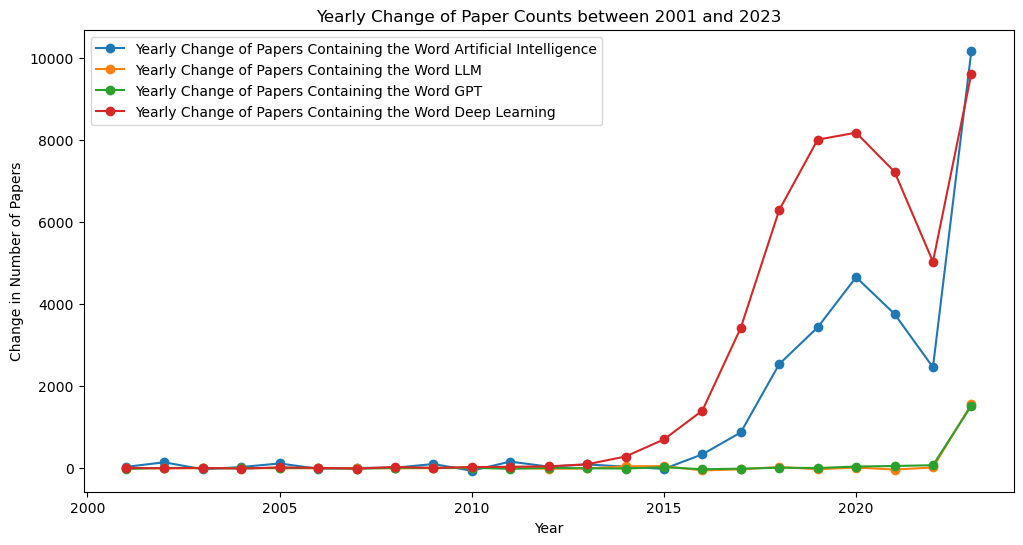

In [87]:
# Step 7: Create a line plot to show the yearly change in paper counts from 2001 to 2023 for the four keywords.
plt.figure(figsize=(12, 6))

plt.plot(change_data["Year"], change_data["AI Papers Change"], label="Yearly Change of Papers Containing the Word Artificial Intelligence", marker="o")
plt.plot(change_data["Year"], change_data["LLM Papers Change"], label="Yearly Change of Papers Containing the Word LLM", marker="o")
plt.plot(change_data["Year"], change_data["GPT Papers Change"], label="Yearly Change of Papers Containing the Word GPT", marker="o")
plt.plot(change_data["Year"], change_data["DL Papers Change"], label="Yearly Change of Papers Containing the Word Deep Learning", marker="o")

plt.xlabel("Year")
plt.ylabel("Change in Number of Papers")
plt.title("Yearly Change of Paper Counts between 2001 and 2023")
plt.legend()
plt.show()

Keywords "AI" and "DL" have bigger changes in terms of numbers compared with keyworks "LLM" and "GPT". Also, papers about AI and DL started to increase significantly in mid-2010s, but papers abouts LLM and GPT started to increase after 2022.

Additionally, I calculate the change rates across keywords and years, as shown below (this is not part of my homework answer, just some extra code).

In [73]:
Years = []
AI_change_rates = []
LLM_change_rates = []
GPT_change_rates = []
DL_change_rates = []

for i in range(0, 23):
    Year = 2000+i+1
    Years.append(Year)
    AI_change_rate = (data_entry_Q4.iloc[i+1,1] - data_entry_Q4.iloc[i,1]) / data_entry_Q4.iloc[i,1]
    AI_change_rates.append(AI_change_rate)
    LLM_change_rate = (data_entry_Q4.iloc[i+1,2] - data_entry_Q4.iloc[i,2]) / data_entry_Q4.iloc[i,2]
    LLM_change_rates.append(LLM_change_rate)
    GPT_change_rate = (data_entry_Q4.iloc[i+1,3] - data_entry_Q4.iloc[i,3]) / data_entry_Q4.iloc[i,3]
    GPT_change_rates.append(GPT_change_rate)
    DL_change_rate = (data_entry_Q4.iloc[i+1,4] - data_entry_Q4.iloc[i,4]) / data_entry_Q4.iloc[i,4]
    DL_change_rates.append(DL_change_rate)

change_rates_data = pd.DataFrame({"Year": Years, "AI Change Rate": AI_change_rates, "LLM Change Rate": LLM_change_rates, "GPT Change Rate": GPT_change_rates, "DL Change Rate": DL_change_rates})
display(change_rates_data)

,Year,AI Change Rate,LLM Change Rate,GPT Change Rate,DL Change Rate
0,2001,0.115789,1.500000,-0.612903,0.421053
1,2002,0.455975,-0.200000,0.666667,0.000000
2,2003,-0.060475,0.000000,0.300000,0.296296
3,2004,0.066667,1.500000,-0.192308,-0.228571
4,2005,0.250000,-0.100000,0.523810,0.703704
5,2006,-0.024138,-0.111111,0.125000,0.195652
6,2007,0.012367,0.875000,-0.361111,-0.163636
7,2008,0.020942,-0.266667,0.434783,0.673913
8,2009,0.174359,0.272727,0.242424,0.103896
9,2010,-0.088792,0.357143,0.292683,0.329412


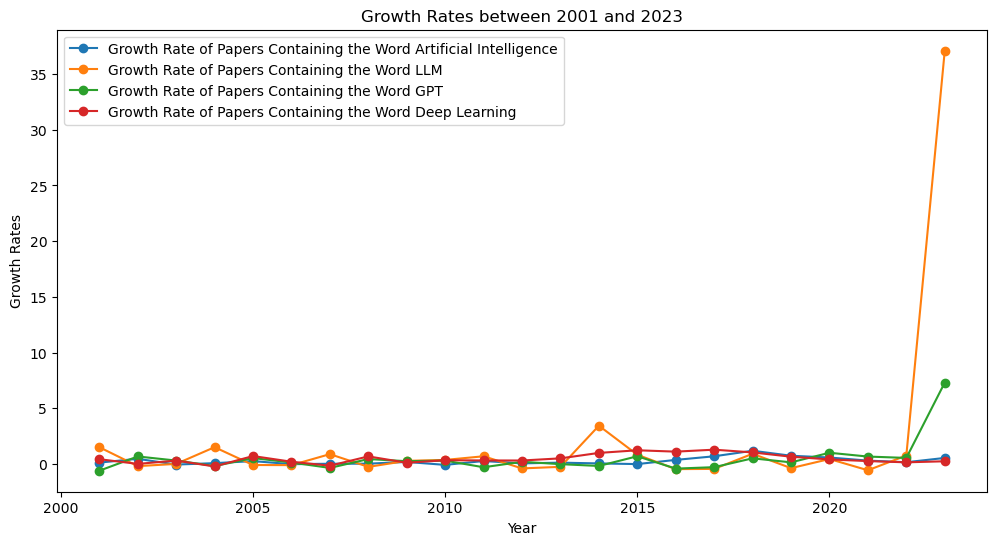

In [82]:
plt.figure(figsize=(12, 6))

plt.plot(change_rates_data["Year"], change_rates_data["AI Change Rate"], label="Growth Rate of Papers Containing the Word Artificial Intelligence", marker="o")
plt.plot(change_rates_data["Year"], change_rates_data["LLM Change Rate"], label="Growth Rate of Papers Containing the Word LLM", marker="o")
plt.plot(change_rates_data["Year"], change_rates_data["GPT Change Rate"], label="Growth Rate of Papers Containing the Word GPT", marker="o")
plt.plot(change_rates_data["Year"], change_rates_data["DL Change Rate"], label="Growth Rate of Papers Containing the Word Deep Learning", marker="o")

plt.xlabel("Year")
plt.ylabel("Growth Rates")
plt.title("Growth Rates between 2001 and 2023")
plt.legend()
plt.show()